# Computer Vision, Assignment - 1
Name : **Sagar Suman** | Roll No. **2019197**




## Question 1: Image Classification

### 1.1) Referring to SVHN Dataset


#### Part a)

Mounting content

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Installing WandB

In [ ]:
pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=86d733aa7b1d37ca861ecf0facd0b4f9eb75f903d991146cccdf64e5fa55b6ee
  Stored in directory: /root/.cache/pip/wheels/b7/0a/67/ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built pathtools


Importing WandB and intilializing it.

In [ ]:
import wandb

In [ ]:
# Initilializing with API key
wandb.login(key="bf141877d75b0ea4b3f9cad3b636889145d1fe44");
wandb.init(project = "CV_A1_Q1");

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: sagar19197. Use `wandb login --relogin` to force relogin


importing scipy.io for processing data file

In [ ]:
import scipy.io

Loading dataset

In [ ]:
SVHN_data = scipy.io.loadmat('/content/gdrive/MyDrive/CV-Assginments-Datasets/CV-A1/Q1/train_32x32.mat');

# For printing variables in this dataset
for variables in SVHN_data.keys():
    print(variables)

__header__
__version__
__globals__
X
y


Extracting X and y

In [ ]:
# FOR X-
X = SVHN_data['X'];
# Printing shape 
print("SHAPE OF X",X.shape);
# FOR y - 
y = SVHN_data['y'];
print("SHAPE OF y",y.shape)

SHAPE OF X (32, 32, 3, 73257)
SHAPE OF y (73257, 1)


Showing DataSet Items

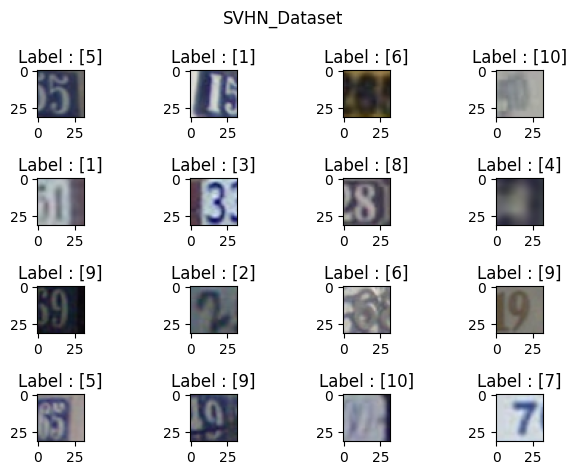

In [ ]:
import matplotlib.pyplot as plt
# For random Images
import random;

# As each image is X[:,:,:,i], and label is y[i]
figure = plt.figure();
for dataItems in range(1,17):
  axis = figure.add_subplot(4,4,dataItems);
  random_image = random.randint(1, len(y));
  axis.imshow(X[:,:,:,random_image]);
  axis.set_title("Label : "+str(y[random_image]));
  
# Showing image
figure.suptitle("SVHN_Dataset");
figure.tight_layout();
figure.show();


We need to reshape X, so that we can split it.

In [ ]:
# Importing Numpy
import numpy as np

In [ ]:
# 32 x 32 x 3 = 3072
X = np.array(X);
# Reshaping
X = X.reshape(3072, 73257);
# Transposing 
X = np.transpose(X);
# Printing shape
print(X.shape);

(73257, 3072)


For splitting train and test, we will using sklearn's train_test_split() method

In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

Firstly, we will split the data set in 90:10 for train+validation and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1);

Then splitting, for 20% validation set 

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2);

Showing Dimension of Train, Testing and Validation

In [ ]:
print("X_train:",X_train.shape,"y_train:", y_train.shape);
print("X_val:",X_val.shape," y_val:",y_val.shape);
print("X_test:",X_test.shape," y_test:", y_test.shape);

X_train: (52744, 3072) y_train: (52744, 1)
X_val: (13187, 3072)  y_val: (13187, 1)
X_test: (7326, 3072)  y_test: (7326, 1)


#### Part b)

Importing PyTorch

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

Creating Custom Dataset Class

In [ ]:
class SVHN_Dataset(Dataset):

  # Init Function
  def __init__(self, data_X, data_y):
    self.data_X = data_X;
    self.data_y = data_y;

  # Len Function
  def __len__(self):
    return len(self.data_X);

  # getItem Function
  def __getitem__(self, idx):
    return self.data_X[idx], self.data_y[idx];


Creating Custom DataLoaders for all Splits

In [ ]:
# For Training Split -
X_train_loader = DataLoader(SVHN_Dataset(X_train, y_train), batch_size = 32, shuffle = True);

# For Validation Split -
X_val_loader = DataLoader(SVHN_Dataset(X_val, y_val), batch_size = 32, shuffle = True);

# For Test Split -
X_test_loader = DataLoader(SVHN_Dataset(X_test, y_test), batch_size = 32, shuffle = True);

#### Part c)

Visualizing Data Distribution across class Labels

In [ ]:
# For Training 
y_train_class_labels, y_train_count = np.unique(y_train, return_counts = True);

# For Validation 
y_val_class_labels, y_val_count = np.unique(y_val, return_counts = True);


For Training

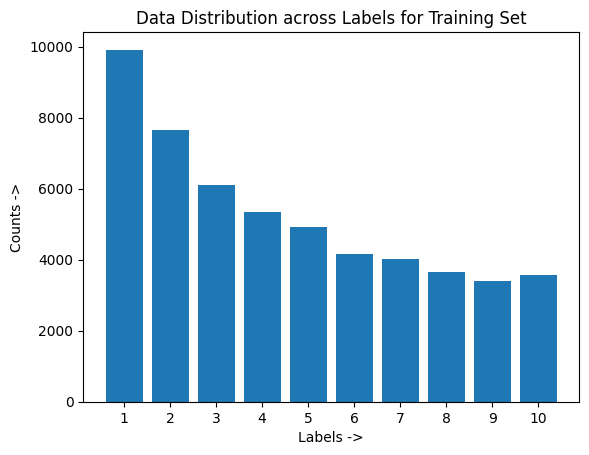

In [ ]:
# Using Bar Graph
plt.bar(y_train_class_labels, y_train_count);
plt.xlabel("Labels ->");
plt.ylabel("Counts ->");
plt.xticks(y_train_class_labels);
plt.title("Data Distribution across Labels for Training Set");

plt.show()


For Validation Sets

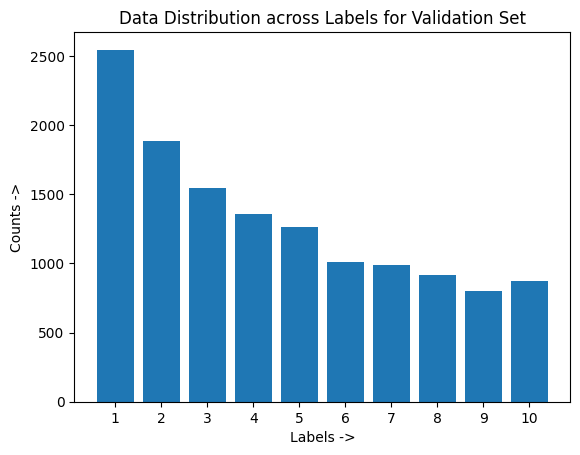

In [ ]:
# Using Bar Graph
plt.bar(y_val_class_labels, y_val_count);
plt.xlabel("Labels ->");
plt.ylabel("Counts ->");
plt.xticks(y_val_class_labels);
plt.title("Data Distribution across Labels for Validation Set");

plt.show()

### 1.1) Training a CNN through Scratch
